Pyrosm is a Python library for reading OpenStreetMap into Geopandas GeoDataFrames. 

Fetching data for cities of Ghana and saving them as shapefiles to be used in QGIS and Tableau. 

Installing using pip install pyrosm

Documentation https://pyrosm.readthedocs.io/en/latest/index.html

In [1]:
#import libraries
from pyrosm.data import sources
from pyrosm import get_data
from pyrosm import OSM

/Users/dzidzi_quist/opt/miniconda3/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
#check available countries in africa
print(sources.africa.available)

['algeria', 'angola', 'benin', 'botswana', 'burkina_faso', 'burundi', 'cameroon', 'canary_islands', 'cape_verde', 'central_african_republic', 'chad', 'comores', 'congo_brazzaville', 'congo_democratic_republic', 'djibouti', 'egypt', 'equatorial_guinea', 'eritrea', 'ethiopia', 'gabon', 'ghana', 'guinea', 'guinea_bissau', 'ivory_coast', 'kenya', 'lesotho', 'liberia', 'libya', 'madagascar', 'malawi', 'mali', 'mauritania', 'mauritius', 'morocco', 'mozambique', 'namibia', 'niger', 'nigeria', 'rwanda', 'saint_helena_ascension_and_tristan_da_cunha', 'sao_tome_and_principe', 'senegal_and_gambia', 'seychelles', 'sierra_leone', 'somalia', 'south_africa', 'south_africa_and_lesotho', 'south_sudan', 'sudan', 'swaziland', 'tanzania', 'togo', 'tunisia', 'uganda', 'zambia', 'zimbabwe']


In [3]:
#get data for Ghana
fp = get_data('ghana')

Downloaded Protobuf data 'ghana-latest.osm.pbf' (66.14 MB) to:
'/var/folders/34/slk6cwcj4m95gq00rt7dzfqc0000gn/T/pyrosm/ghana-latest.osm.pbf'


In [4]:
#to obtain specific objects; Initialize the OSM object 
osm = OSM(fp)

#get buildings
buildings = osm.get_buildings()
buildings.head(2)

Shell is not a LinearRing


,addr:city,addr:country,addr:full,addr:housenumber,addr:housename,addr:postcode,addr:place,addr:street,email,name,...,source,start_date,wikipedia,id,timestamp,version,tags,osm_type,geometry,changeset
0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,4179232,1553796051,4,None,way,"POLYGON ((-0.41096 5.46205, -0.41091 5.46211, ...",NaN
1,None,None,None,None,None,None,None,None,None,None,...,None,None,None,25413931,1615202744,5,None,way,"POLYGON ((-0.18991 5.55669, -0.19006 5.55652, ...",NaN


<AxesSubplot:>

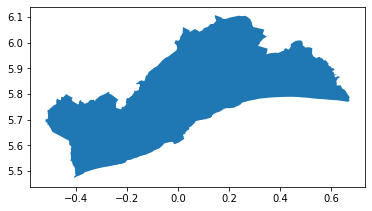

In [6]:
#Get the city of Accra as our bounding box
bounding_box = osm.get_boundaries(name="Accra")
bounding_box.plot()

In [7]:
# Get the shapely geometry from GeoDataFrame
bbox_geom = bounding_box['geometry'].values[0]

# Initiliaze with bounding box
osm = OSM(fp, bounding_box=bbox_geom)

Shell is not a LinearRing


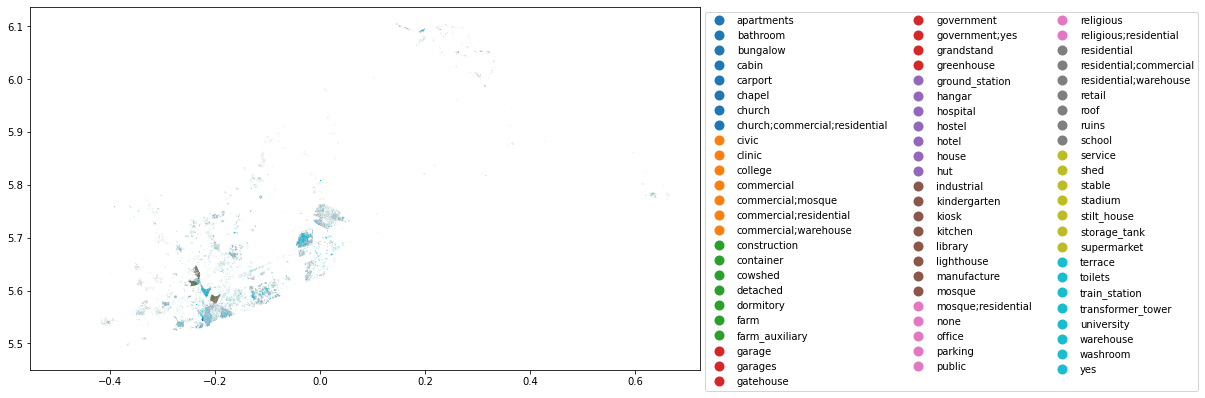

In [8]:
#Retrieve buildings for Accra
accra = osm.get_buildings()

#plotting the buildings and specify colors according the type of the building
ax = accra.plot(column="building", figsize=(12,12), legend=True, legend_kwds=dict(loc='upper left', ncol=3, bbox_to_anchor=(1, 1)))


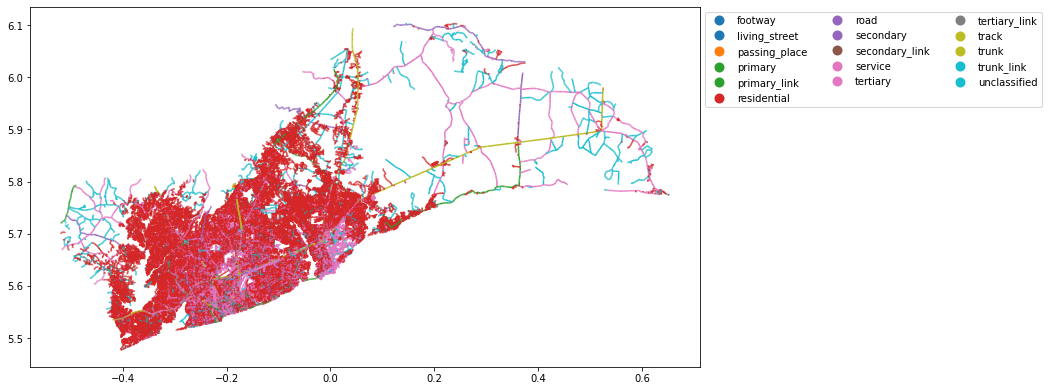

In [9]:
#Retrieve the road network(the driving road netwoek) for Accra

accra2 = osm.get_network('driving')

#plotting the driving road network
ax = accra2.plot(column="highway", figsize=(12,12), legend=True, legend_kwds=dict(loc='upper left', ncol=3, bbox_to_anchor=(1, 1)))


In [11]:
#saving as shapefile and importing into QGIS to take a portion of the data to visualize in Tableau
accra2.to_file("accra_road.shp")
accra.to_file("accra.shp")

/var/folders/34/slk6cwcj4m95gq00rt7dzfqc0000gn/T/ipykernel_85475/2380076843.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  accra2.to_file("accra_road.shp")
/var/folders/34/slk6cwcj4m95gq00rt7dzfqc0000gn/T/ipykernel_85475/2380076843.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  accra.to_file("accra.shp")
